In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

1. Read the City Cemetery data into a pandas DataFrame. Hint: see the read_excel function.

In [11]:
cemetery_df= pd.read_excel(r"C:\Users\antoi\nss-data-analytics\Projects\advanced-pandas-antoinette-anderson\data\Historic_Nashville_City_Cemetery_Interments__1846-1979.xlsx", skiprows=None)
print(cemetery_df)

       Volume                           Name Burial Month  Month No.  \
0          6B                Bell, Nancy Ann          Aug        8.0   
1          6W  Drake, Mary Edith Smith, Mrs.          May        5.0   
2          6D                  Davis, Bessie          Sep        9.0   
3          6C            Creech, Emily Green          Aug        8.0   
4          6W            Creech, Emily Green          Aug        8.0   
...       ...                            ...          ...        ...   
19740  4-1846            Kingsley, A., Capt.          Sep        9.0   
19741  4-1846                         infant          Sep        9.0   
19742  4-1846                 White, Lucinda          Sep        9.0   
19743  5-1881               Higgins, Rebecca          Apr        4.0   
19744  5-1881                       Eves, R.          Apr        4.0   

       Burial Day  Burial Year Sex Race   Age             Residence  \
0             6.0       1979.0   F    W  10.0                   

In [65]:
cemetery_df.head()

,Volume,Name,Burial Month,Month No.,Burial Day,Burial Year,Sex,Race,Age,Residence,Cause of Death/Burial,Ave,Section/Lot,Remarks
0,6B,"Bell, Nancy Ann",Aug,8.0,6.0,1979.0,F,W,10.0,NaN,NaN,Oak,"sec. 28 NW, lot 12",J. L. Hughes lot
1,6W,"Drake, Mary Edith Smith, Mrs.",May,5.0,19.0,1979.0,F,W,67.0,"Madison, Tenn",Cancer,"Locust, Boyd Lot",lot 10,"wife of Alex M. Drake, Madison Funeral Home Of..."
2,6D,"Davis, Bessie",Sep,9.0,19.0,1979.0,F,W,90.0,Nashville,Old Age,Poplar,"McAllister, E25, lot 8",daughter of Helen Davis
3,6C,"Creech, Emily Green",Aug,8.0,NaN,1978.0,F,W,91.0,Nashville,NaN,sect.ion 9,15,Magnolia
4,6W,"Creech, Emily Green",Aug,8.0,NaN,1978.0,F,W,91.0,"Nashville, Tennessee",NaN,NaN,NaN,Malgnolia


In [66]:
cemetery_df.tail()

,Volume,Name,Burial Month,Month No.,Burial Day,Burial Year,Sex,Race,Age,Residence,Cause of Death/Burial,Ave,Section/Lot,Remarks
19740,4-1846,"Kingsley, A., Capt.",Sep,9.0,28.0,1846.0,M,W,67.0,City,Feever,Cedar,lot,superintendent of Nashville Cemetery
19741,4-1846,infant,Sep,9.0,28.0,1846.0,M,W,NaN,City,Diarherea,Central,lot,son of John Bateman
19742,4-1846,"White, Lucinda",Sep,9.0,29.0,1846.0,F,W,25.0,City,Consumption,Central,200,Fees to be paid by M. Jennings
19743,5-1881,"Higgins, Rebecca",Apr,4.0,10.0,NaN,F,W,68.0,City,Heart Disease,Cherry,lot,"box paid, grave on lot"
19744,5-1881,"Eves, R.",Apr,4.0,25.0,NaN,M,W.,54.0,City,Heart Disease,Magnolia,lot,"box paid, grave on lot"


In [83]:
cemetery_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19745 entries, 0 to 19744
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Volume                 19745 non-null  object 
 1   Name                   19740 non-null  object 
 2   Burial Month           19706 non-null  object 
 3   Month No.              19706 non-null  float64
 4   Burial Day             19691 non-null  float64
 5   Burial Year            19743 non-null  float64
 6   Sex                    19503 non-null  object 
 7   Race                   19698 non-null  object 
 8   Age                    11071 non-null  float64
 9   Residence              19687 non-null  object 
 10  Cause of Death/Burial  19428 non-null  object 
 11  Ave                    19092 non-null  object 
 12  Section/Lot            18625 non-null  object 
 13  Remarks                16396 non-null  object 
dtypes: float64(4), object(10)
memory usage: 2.1+ MB


2a. Find the 10 most common (known) recorded causes of death.

In [71]:
cemetery_df['Cause of Death/Burial'].value_counts().head(10)

Cause of Death/Burial
Consumption     1767
Unknown         1260
Still Born       841
Cholrea          667
Not Known        639
Old Age          604
Cholera          575
Pneumonia        516
Flux             469
Complication     446
Name: count, dtype: int64

2b Clean up some of the misspellings. Use the replace method to clean up some of the causes of death. For example, replace "Cholrea" with "Cholera" and "Still Born" with "Stillborn".

In [89]:
cemetery_replace=cemetery_df.replace('Cholrea', 'Cholera').replace('Still Born', 'Stillborn').replace('Feever', 'Fever').replace('Not Known', 'Unknown').replace('Diarherea', 'Diarrhea')
print(cemetery_replace)

       Volume                           Name Burial Month  Month No.  \
0          6B                Bell, Nancy Ann          Aug        8.0   
1          6W  Drake, Mary Edith Smith, Mrs.          May        5.0   
2          6D                  Davis, Bessie          Sep        9.0   
3          6C            Creech, Emily Green          Aug        8.0   
4          6W            Creech, Emily Green          Aug        8.0   
...       ...                            ...          ...        ...   
19740  4-1846            Kingsley, A., Capt.          Sep        9.0   
19741  4-1846                         infant          Sep        9.0   
19742  4-1846                 White, Lucinda          Sep        9.0   
19743  5-1881               Higgins, Rebecca          Apr        4.0   
19744  5-1881                       Eves, R.          Apr        4.0   

       Burial Day  Burial Year Sex Race   Age             Residence  \
0             6.0       1979.0   F    W  10.0                   

c. After correcting the spellings, find the 10 most common causes of death and create a bar chart to display your findings.

In [91]:
cemetery_replace['Cause of Death/Burial'].value_counts().head(10)


Cause of Death/Burial
Unknown         1899
Consumption     1767
Cholera         1242
Stillborn        926
Old Age          604
Pneumonia        516
Flux             469
Complication     446
Cold             421
Teething         411
Name: count, dtype: int64

<Axes: ylabel='Cause of Death/Burial'>

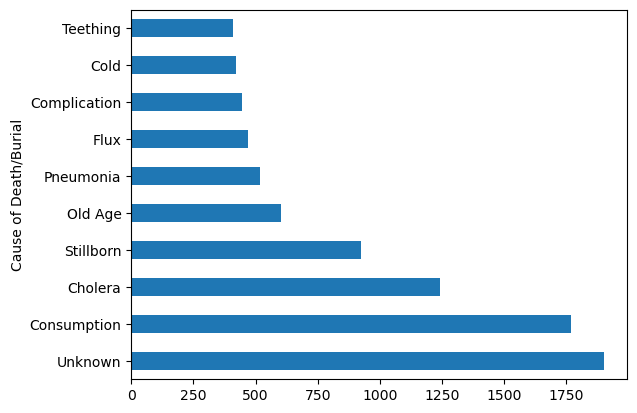

In [92]:
cemetery_replace['Cause of Death/Burial'].value_counts().head(10).plot(kind='barh')

3.Create a line chart showing the number of burials per year.

Burial Year
1864.0    1372
1865.0    1366
1866.0    1354
1863.0     836
1850.0     809
1849.0     745
1862.0     627
1854.0     596
1860.0     575
1873.0     559
1852.0     552
1867.0     542
1868.0     504
1859.0     482
1847.0     476
1855.0     476
1861.0     455
1848.0     447
1853.0     429
1856.0     428
1858.0     415
1857.0     402
1851.0     385
1874.0     337
1870.0     312
1871.0     285
1872.0     283
1846.0     246
1869.0     209
1880.0     204
1875.0     159
1881.0     156
1877.0     155
1876.0     148
1879.0     138
1883.0     128
1878.0     118
1882.0     111
1884.0      99
1886.0      70
Name: count, dtype: int64

4a. Use the crosstab function to build a summary table showing the number of burials per year per month. You should have one row per year and one column for month.